In [1]:
import scipy.stats as ss
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec as gs
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

#### Mark generator function

In [2]:
def grades(n=1000): # get an array of grades in a range and distribution parameters
    test_type = tuple(input("Enter the types of tests (seperated by a space): ").split()) # type of evaluations
    test_amount = tuple(int(input(f"How many tests for {x}?: ")) for x in test_type) # amount of tests per evaluation
    max_mark = tuple(int(input(f"{x} out of how many marks?: ")) for x in test_type) # maximum marks for each type of tests

    while True:
        weightage = tuple(int(input(f"What is the weightage for {x}?: ")) for x in test_type)
        if np.sum(weightage) == 100:
            break
        else:
            print("Make sure the weightage for all tests add up to 1.0!\n")
    pass_percent = int(input("What is the passing percentage threshold?: "))

    while True:
        final_test_name = input(f"Which of these tests {test_type} is the final test?: ")
        if final_test_name in test_type:
            break
        else:
            print("Make sure the name of the final test is enterred correctly!\n")
            
    # mean = 65% of highest marks, std = 33% of highest marks
#     grade_gen = [round(x) for x in (ss.truncnorm.rvs(((lower - int(upper * 0.65)) / (upper//3)),
#                                          ((upper - int(upper * 0.65)) / (upper//3)), 
#                                          loc=int(upper * 0.65), scale=upper//3, size=n))]
            
    df = pd.DataFrame(index=range(1, 1001)) # making the dataframe and generating dummy marks
    df.index.name = 'Student'
    for x in range(len(test_type)):
        m = max_mark[x] # storing max marks for each type of test 
        if test_amount[x] > 1:
            for y in range(1, test_amount[x] + 1):
                df[f"{test_type[x]} {y}"] = [round(x) for x in (ss.truncnorm.rvs(((0 - int(m * 0.65)) / (m//3)),
                                         ((m - int(m * 0.65)) / (m//3)), 
                                         loc=int(m * 0.65), scale=m//3, size=n))]
        else:
            for y in range(1, test_amount[x] + 1):
                df[f"{test_type[x]}"] = [round(x) for x in (ss.truncnorm.rvs(((0 - int(m * 0.65)) / (m//3)),
                                         ((m - int(m * 0.65)) / (m//3)), 
                                         loc=int(m * 0.65), scale=m//3, size=n))]  

    # calculating total grade weight weightage
    df['Total %'] = [0] * len(df)
    for x in range(len(test_type)):
        df['Total %'] += round((df.filter(regex=test_type[x]).sum(axis=1) / (test_amount[x] * max_mark[x])) * weightage[x], 2)

    # determining pass/fail
    df['Pass/Fail'] = ["Pass" if x >= pass_percent else "Fail" for x in df['Total %']]
    
    print(f"\nStudents passed -> {len(df[df['Pass/Fail'] == 'Pass'])}\
    \nStudents Failed -> {len(df[df['Pass/Fail'] == 'Fail'])}\n")
    
    for x in range(len(test_type)):
        if test_amount[x] > 1: # plotting grade distribution for tests with more than one evaluation of that type
            if test_amount[x] % 2 != 0:
                y = test_amount[x]+1
            else:
                y= test_amount[x]

            fig = plt.figure(figsize=(12, 9), constrained_layout=True)
            grid = gs(nrows=int(y/2), ncols=2, figure=fig)
            for y in range(test_amount[x]):
                ax = fig.add_subplot(grid[y])
                sns.distplot(df.filter(regex=test_type[x]).iloc[:, y], fit=ss.norm, ax=ax, norm_hist=True, color='blue',
                            hist_kws=dict(edgecolor='black', align='right', color='blue'), bins=max_mark[x])
                plt.xticks(range(0, max_mark[x]+1))
            plt.xlabel('')
            fig.suptitle(f"Grade for {test_type[x]}", fontsize=15)
            grid.tight_layout(fig)
            plt.show()
        else: # plotting grade distribution for singular evaluation test 
            plt.figure(figsize=(10, 7))
            sns.distplot(df[test_type[x]], fit=ss.norm, norm_hist=True, color='blue',
                            hist_kws=dict(edgecolor='black', align='right', color='blue'), bins=max_mark[x])
            plt.title(f"Grade for {test_type[x]}", fontsize=15)
            plt.tight_layout()
            plt.show()
            
    # dropping unneeded final semester test
    df.drop(final_test_name, axis=1, inplace=True)
            
    return df

Enter the types of tests (seperated by a space): Lab Assignment Mid-Term Project Final
How many tests for Lab?: 8
How many tests for Assignment?: 4
How many tests for Mid-Term?: 1
How many tests for Project?: 1
How many tests for Final?: 1
Lab out of how many marks?: 10
Assignment out of how many marks?: 20
Mid-Term out of how many marks?: 50
Project out of how many marks?: 100
Final out of how many marks?: 100
What is the weightage for Lab?: 20
What is the weightage for Assignment?: 10
What is the weightage for Mid-Term?: 10
What is the weightage for Project?: 40
What is the weightage for Final?: 20
What is the passing percentage threshold?: 60
Which of these tests ('Lab', 'Assignment', 'Mid-Term', 'Project', 'Final') is the final test?: Final

Students passed -> 437    
Students Failed -> 563



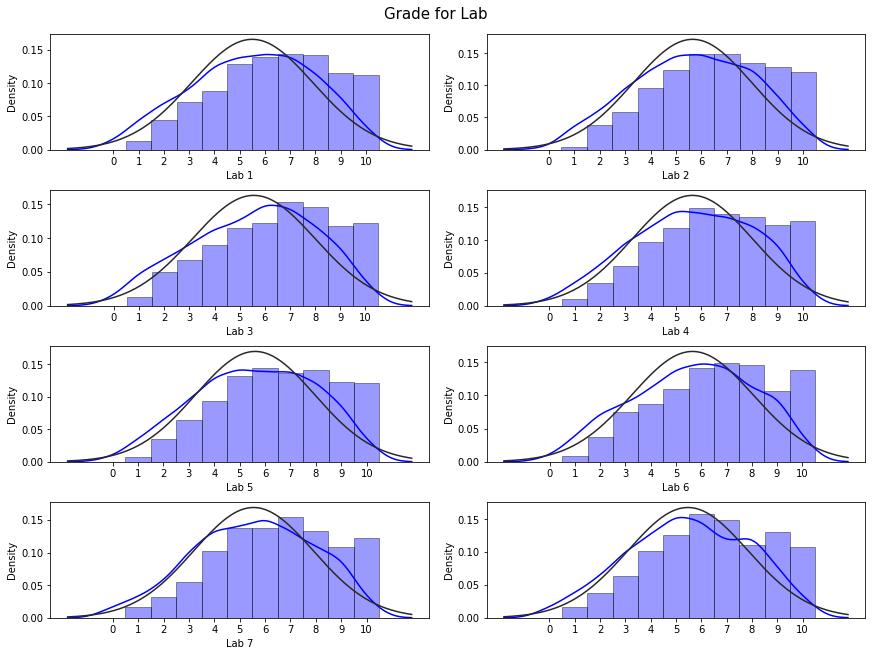

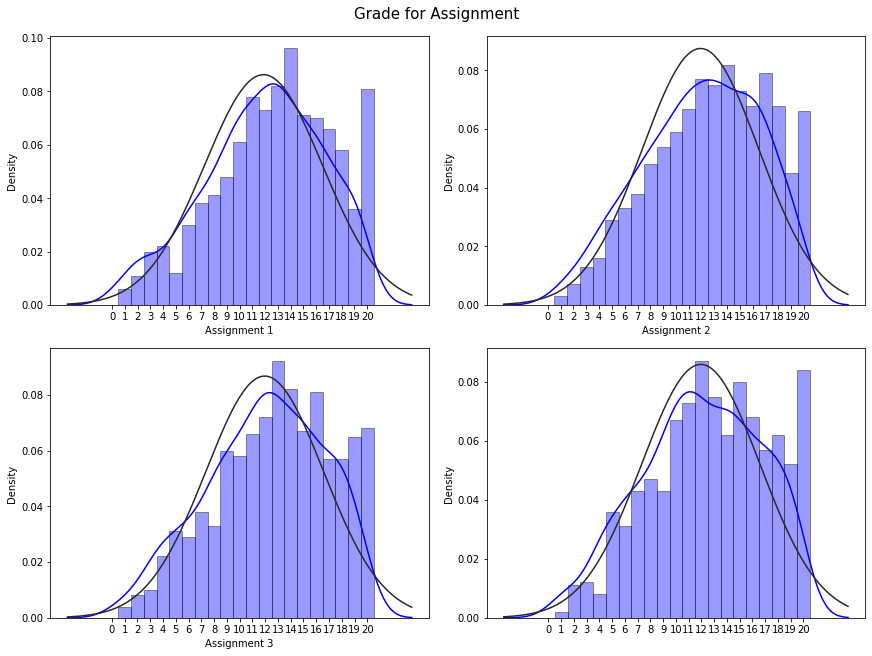

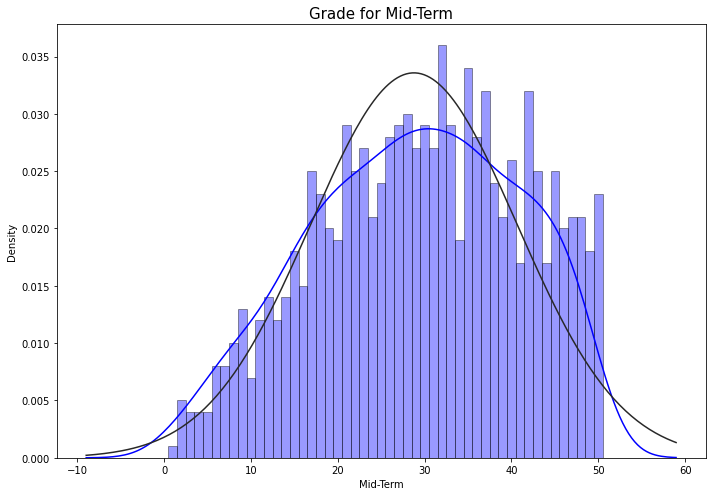

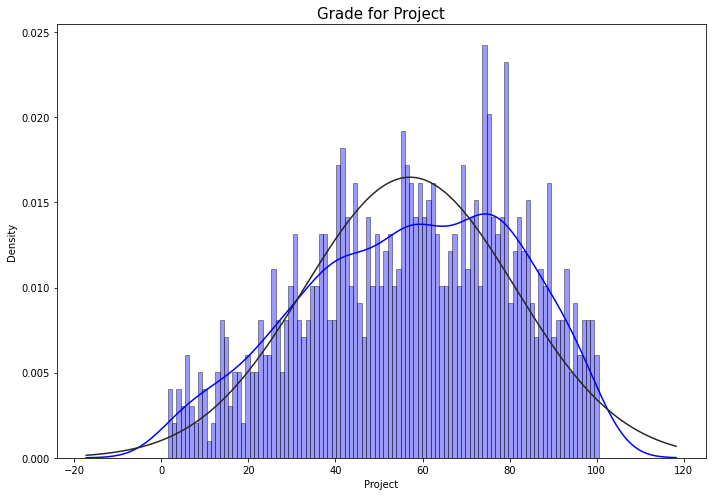

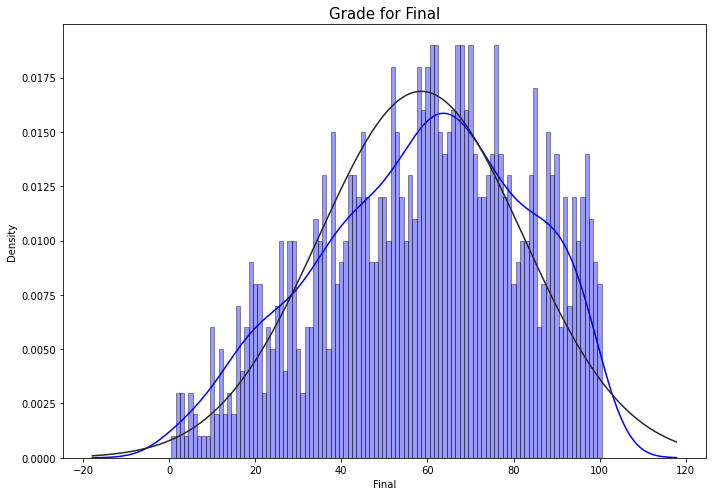

,Lab 1,Lab 2,Lab 3,Lab 4,Lab 5,Lab 6,Lab 7,Lab 8,Assignment 1,Assignment 2,Assignment 3,Assignment 4,Mid-Term,Project,Total %,Pass/Fail
Student,,,,,,,,,,,,,,,,
1,1,4,6,5,8,8,6,3,14,18,10,10,24,55,53.75,Fail
2,8,5,4,5,5,2,3,9,19,5,9,9,25,79,68.90,Pass
3,5,4,3,6,7,8,5,7,17,13,15,10,30,28,37.93,Fail
4,2,8,6,6,5,4,8,7,18,14,12,17,31,53,54.92,Fail
5,4,9,2,8,4,5,4,3,16,9,8,14,8,75,62.83,Pass


In [3]:
df = grades()
df.head()